# Naive bayes hands On

## Importing standard library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


## Generate Gaussian Naive bayes

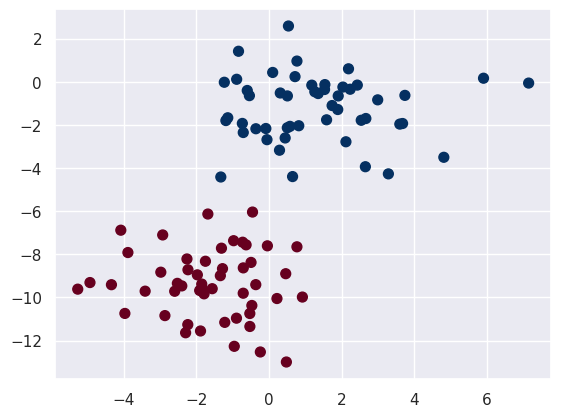

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'RdBu')


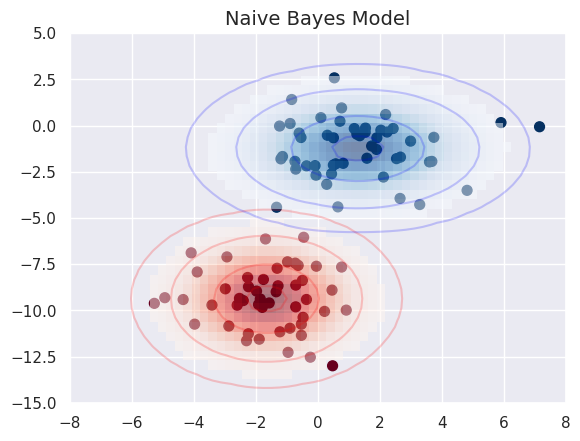

In [11]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

for label, color in enumerate(['red', 'blue']):
    mask = (y == label)
    mu, std = X[mask].mean(0), X[mask].std(0)
    P = np.exp(-0.5 * (Xgrid - mu) ** 2 / std ** 2).prod(1)
    Pm = np.ma.masked_array(P, P < 0.03)
    ax.pcolormesh(xx, yy, Pm.reshape(xx.shape), alpha=0.5,
              cmap=color.title() + 's')

    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.01, 0.1, 0.5, 0.9],
               colors=color, alpha=0.2)

ax.set(xlim=xlim, ylim=ylim)
plt.show()




(np.float64(-5.890554373486014),
 np.float64(7.777566725032841),
 np.float64(-13.775943665162341),
 np.float64(3.3634536696825847))

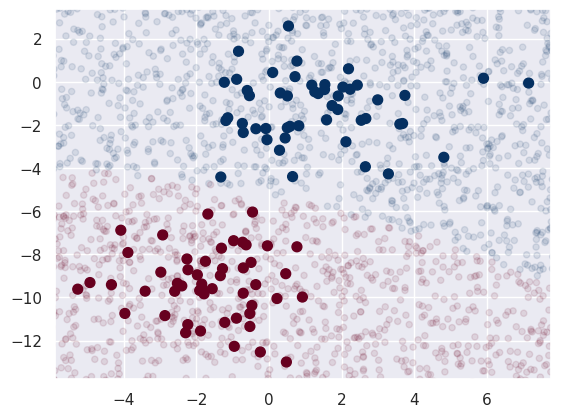

In [14]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X, y)

rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

plt.scatter(X[:, 0], X[:, -1], c = y, s = 50, cmap = 'RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c = ynew, s = 20, cmap = 'RdBu', alpha = 0.1)
plt.axis(lim)

In [15]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)


array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [16]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()

data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [19]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset = 'train', categories=categories)
test = fetch_20newsgroups(subset = 'test', categories=categories)

print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)


Text(73.45000000000005, 0.5, 'predicted label')

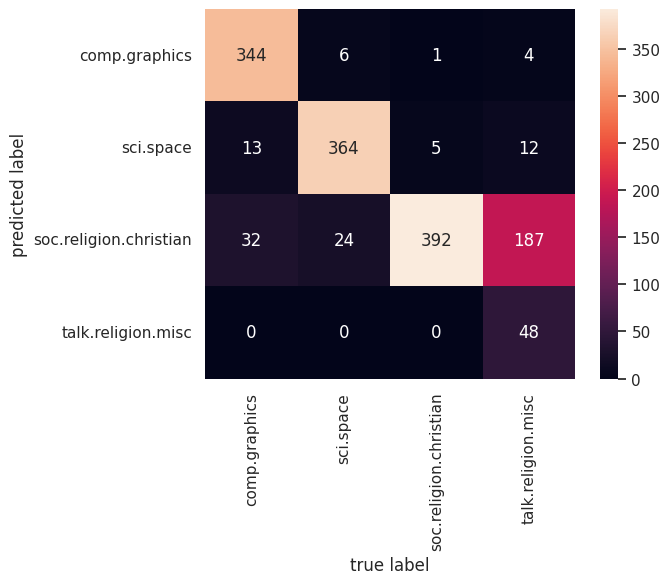

In [22]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = 'False', xticklabels=train.target_names, yticklabels=train.target_names)

plt.xlabel('true label')
plt.ylabel('predicted label')


In [25]:
def predict_category(text):
    pred = model.predict([text])[0]
    return train.target_names[pred]

print(predict_category('sending a payload to the ISS'))
print(predict_category('discussing islam vs atheism'))
print(predict_category('deterining the screen solution'))



sci.space
soc.religion.christian
comp.graphics


In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import pandas as pd
import csv

df = pd.read_csv('IMDB.csv', quoting=csv.QUOTE_ALL, on_bad_lines='warn', engine='python', encoding='utf-8')
df.head()



/tmp/ipython-input-2346977769.py:9: ParserWarning: Skipping line 11040: unexpected end of data

  df = pd.read_csv('IMDB.csv', quoting=csv.QUOTE_ALL, on_bad_lines='warn', engine='python', encoding='utf-8')


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [33]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

X = df['review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vec = vectorizer
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [35]:
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

y_pred = nb_model.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
print(f"akurasi untuk data diskret: {accuracy:.4f}")
print(classification_report(y_test, y_pred))


akurasi untuk data diskret: 0.8415
              precision    recall  f1-score   support

           0       0.81      0.88      0.84      1069
           1       0.88      0.80      0.84      1139

    accuracy                           0.84      2208
   macro avg       0.84      0.84      0.84      2208
weighted avg       0.84      0.84      0.84      2208



In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

scaler = StandardScaler(with_mean=False)
X_train_tfidf = scaler.fit_transform(X_train_tfidf)
X_test_tfidf = scaler.transform(X_test_tfidf)

gnb_model = GaussianNB()
gnb_model.fit(X_train_tfidf, y_train)
y_pred_tfidf = gnb_model.predict(X_test_tfidf)

accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print(f"Akurasi untuk data kontinu (TF-IDF): {accuracy_tfidf:.4f}")
print(classification_report(y_test, y_pred_tfidf))

Akurasi untuk data kontinu (TF-IDF): 0.7948
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      1069
           1       0.82      0.78      0.80      1139

    accuracy                           0.79      2208
   macro avg       0.80      0.80      0.79      2208
weighted avg       0.80      0.79      0.79      2208



/tmp/ipython-input-2787921714.py:11: ParserWarning: Skipping line 11040: unexpected end of data

  df = pd.read_csv('IMDB.csv', quoting=csv.QUOTE_ALL, on_bad_lines='warn', engine='python', encoding='utf-8')


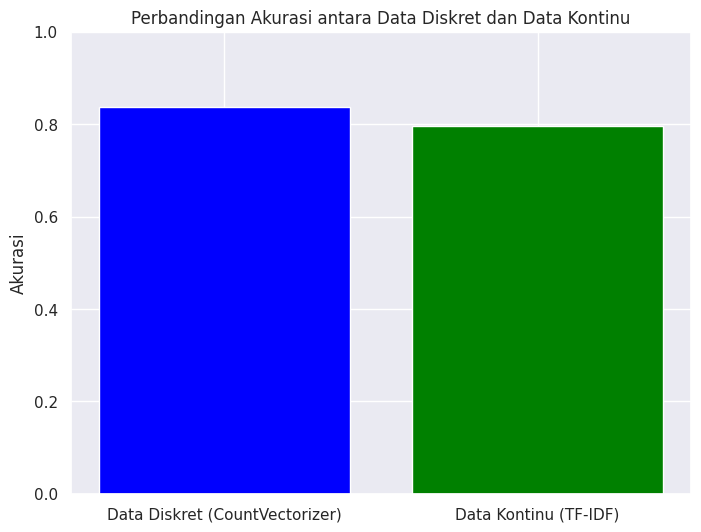

In [39]:
# (MultinomialNB) and continuous data (GaussianNB)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('IMDB.csv', quoting=csv.QUOTE_ALL, on_bad_lines='warn', engine='python', encoding='utf-8')

X = df['review']
y = df['sentiment'].map({'positive': 1, 'negative': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Count Vectorizer
count_vectorizer = CountVectorizer(max_features=5000)
X_train_count = count_vectorizer.fit_transform(X_train).toarray()
X_test_count = count_vectorizer.transform(X_test).toarray()

mnb_model = MultinomialNB()
mnb_model.fit(X_train_count, y_train)
y_pred_count = mnb_model.predict(X_test_count)
accuracy_count = accuracy_score(y_test, y_pred_count)

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = tfidf_vectorizer.transform(X_test).toarray()

gnb_model = GaussianNB()
gnb_model.fit(X_train_tfidf, y_train)
y_pred_tfidf = gnb_model.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)

# Plot
labels = ['Data Diskret (CountVectorizer)', 'Data Kontinu (TF-IDF)']
accuracies = [accuracy_count, accuracy_tfidf]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.title('Perbandingan Akurasi antara Data Diskret dan Data Kontinu')
plt.ylabel('Akurasi')
plt.ylim(0, 1)
plt.show()